# Kadin's Big Data Engineering Notebook

## Mock Business:
#### Name: MT Fulfillments
#### Scope: National
#### Description: A small fulfillment center servicing an online storefront, ships nationally.
#### Number of Locations: 1 fulfillment center
#### Number of Employees: 30

## Model a Business Process:

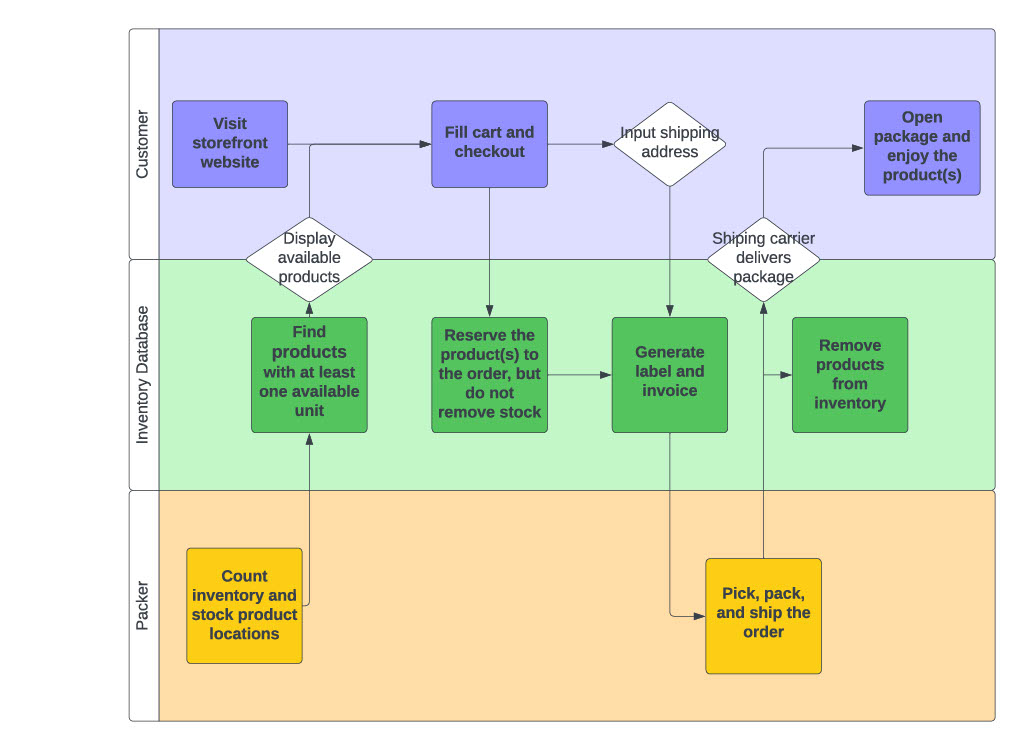 <br><br>

## Logical Data Model:

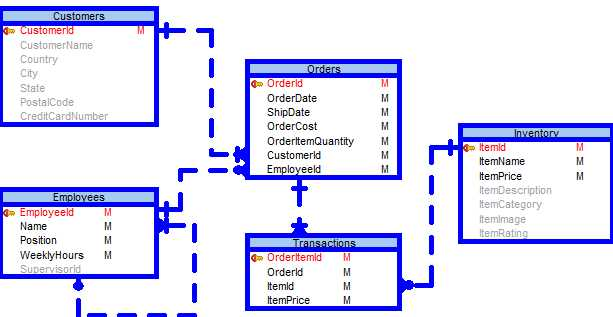 <br><br>

## Physical Data Model:

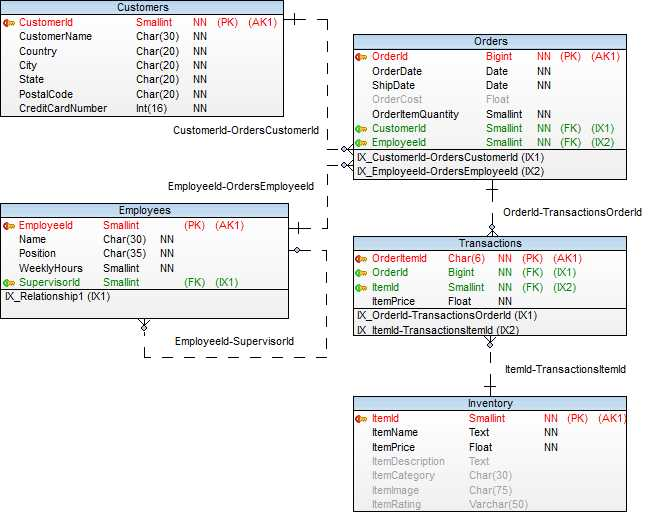 <br><br>

## DDL Script for The Physical Data Model:

-- Create tables section -------------------------------------------------

-- Table Customers

CREATE TABLE `Customers`
(
  `CustomerId` Smallint NOT NULL AUTO_INCREMENT
  COMMENT 'This is the id and primary key for the customer',
  `CustomerName` Char(30) NOT NULL
  COMMENT 'This is the name of the customer',
  `Counrty` Char(20) NOT NULL
  COMMENT 'This is the shipping country of the customer',
  `City` Char(20) NOT NULL
  COMMENT 'This is the shiping city of the customer',
  `State` Char(20) NOT NULL
  COMMENT 'This is the shipping stateprovinceregion of the customer',
  `PostalCode` Char(20) NOT NULL
  COMMENT 'This is the shipping zip codepostal code of the customer',
  `CreditCardNumber` Int(16) NOT NULL DEFAULT 0000000000000000
  COMMENT 'This is the billing creditdebit card number',
  PRIMARY KEY (`CustomerId`),
  UNIQUE `CustomerId` (`CustomerId`)
)
COMMENT = 'This is the table holding the customer shipping data'
;

-- Table Orders

CREATE TABLE `Orders`
(
  `OrderId` Bigint NOT NULL AUTO_INCREMENT
  COMMENT 'The Id of the Order',
  `OrderDate` Date NOT NULL
  COMMENT 'The Date the order was placed',
  `ShipDate` Date NOT NULL
  COMMENT 'The date the order was shipped',
  `OrderCost` Float
  COMMENT 'The total price of the order',
  `OrderItemQuantity` Smallint NOT NULL
  COMMENT 'The total number of items in the order',
  `CustomerId` Smallint NOT NULL,
  `EmployeeId` Smallint NOT NULL,
  PRIMARY KEY (`OrderId`),
  UNIQUE `OrderId` (`OrderId`)
)
;

CREATE INDEX `IX_CustomerId-OrdersCustomerId` ON `Orders` (`CustomerId`)
;

CREATE INDEX `IX_EmployeeId-OrdersEmployeeId` ON `Orders` (`EmployeeId`)
;

-- Table Transactions

CREATE TABLE `Transactions`
(
  `OrderItemId` Char(6) NOT NULL,
  `OrderId` Bigint NOT NULL
  COMMENT 'The order Id of the order associated with this transaction',
  `ItemId` Smallint NOT NULL
  COMMENT 'The ItemId of the item associated with this transaction',
  `ItemPrice` Float NOT NULL
  COMMENT 'The price of the item associated with this transaction'
)
;

CREATE INDEX `IX_OrderId-TransactionsOrderId` ON `Transactions` (`OrderId`)
;

CREATE INDEX `IX_ItemId-TransactionsItemId` ON `Transactions` (`ItemId`)
;

ALTER TABLE `Transactions` ADD PRIMARY KEY (`OrderItemId`)
;

ALTER TABLE `Transactions` ADD UNIQUE `OrderItemId` (`OrderItemId`)
;

-- Table Inventory

CREATE TABLE `Inventory`
(
  `ItemId` Smallint NOT NULL AUTO_INCREMENT,
  `ItemName` Char(30) NOT NULL
  COMMENT 'The name of the item',
  `ItemPrice` Float NOT NULL
  COMMENT 'The price of the item',
  `ItemDescription` Char(1000)
  COMMENT 'The description of the item',
  `ItemCategory` Char(30)
  COMMENT 'The category of the item',
  `ItemImage` Char(75)
  COMMENT 'The link the the item image',
  `ItemRating` Json
  COMMENT 'The item''s average raiting and number of ratings
format{''rate''[average rating], ''count''[number of ratings]}',
  PRIMARY KEY (`ItemId`),
  UNIQUE `ItemId` (`ItemId`)
)
;

-- Create foreign keys (relationships) section -------------------------------------------------

ALTER TABLE `Orders` ADD CONSTRAINT `CustomerId-OrdersCustomerId` FOREIGN KEY (`CustomerId`) REFERENCES `Customers` (`CustomerId`) ON DELETE RESTRICT ON UPDATE RESTRICT
;

ALTER TABLE `Orders` ADD CONSTRAINT `EmployeeId-OrdersEmployeeId` FOREIGN KEY (`EmployeeId`) REFERENCES `Employees` (`EmployeeId`) ON DELETE RESTRICT ON UPDATE RESTRICT
;

ALTER TABLE `Transactions` ADD CONSTRAINT `OrderId-TransactionsOrderId` FOREIGN KEY (`OrderId`) REFERENCES `Orders` (`OrderId`) ON DELETE RESTRICT ON UPDATE RESTRICT
;

ALTER TABLE `Transactions` ADD CONSTRAINT `ItemId-TransactionsItemId` FOREIGN KEY (`ItemId`) REFERENCES `Inventory` (`ItemId`) ON DELETE RESTRICT ON UPDATE RESTRICT
;

### Using dbeaver, this script was deployed to an RDS instance running MySQL, named bde-capstone

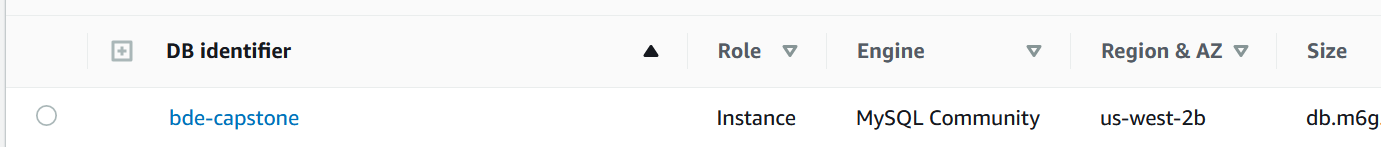

## Get or Generate Data to Populate Your RDS Database
## Master Data Tables:

### Customer Table

#### The data for the customer table was created from the sample-superstore.csv downloaded as a csv from Kaggle. https://www.kaggle.com/datasets/vivek468/superstore-dataset-final.
#### Of note, the customer data table contains a column of credit card numbers. For the purposes of this project, a mock 12 digit number was generated. If this was an actual customer's credit card numbers, efforts would be taken to encrypt the data.

In [ ]:
import pandas as pd

Import the raw data from the local machine

In [ ]:
Raw_df = pd.read_csv("C:/Users/kadin/OneDrive/Desktop/Big Data Engineering Bootcamp/Capstone/Jupyter Notebook/Sample - Superstore.csv")

Clean the raw data by selecting only the relevant columns of information and dropping any duplicated rows. This leaves 4911 unique customers.

In [ ]:
Clean_df = Raw_df[['Customer Name', 'Country', 'City', 'State', 'Postal Code']]
Clean2_df = Clean_df.drop_duplicates().copy()
Clean2_df.reset_index(drop=True, inplace=True)

Generate fake credit card numbers for each of the Customers and add a CreditCardNumber Column.

In [ ]:
CC = 0
CC_lst = []
for i in range(4910):
    CC_lst.append(str(CC).zfill(12))
    CC += 1
    
Clean2_df['CreditCardNumber'] = CC_lst

Generate CustomerID column

In [ ]:
Clean2_df.index.set_names(['CustomerId'], inplace=True)
Clean2_df.reset_index(inplace=True)
Clean2_df['CustomerId'] = Clean2_df['CustomerId'] + 1
Clean2_df.rename(columns={'Customer Name':'CustomerName','Postal Code':'PostalCode'})
Customers_df=Clean2_df

print(Customers_df.head())

### Employee Table

#### The Employee Table was programatically generated based off of a list of randomly generated names from from https://www.randomlists.com/random-names?qty=30. I chose to have 30 names but the code is reactive to the length of the list and will work for any number

Import packages

In [ ]:
import pandas as pd
import random

Create a list of the randomly generated names

In [ ]:
Names_lst = ['Madison Spencer',
    'Isaac Frost',
    'Cailyn Good',
    'Matilda Malone',
    'Kiera Cooper',
    'Yael Best',
    'Brock Anthony',
    'Lexi Jordan',
    'Natalia Mcbride',
    'Deacon Vang',
    'Rolando Humphrey',
    'Nick Ramsey',
    'Damaris Serrano',
    'Brennan Bauer',
    'Finnegan Castaneda',
    'Jay Carlson',
    'Ellis Pham',
    'Shannon Carson',
    'Jeramiah Frederick',
    'Britney Zhang',
    'Micheal Carpenter',
    'Stephen Schultz',
    'Brennan Stout',
    'Karsyn Boyer',
    'Spencer Costa',
    'Brenna Smith',
    'Nylah Cisneros',
    'Camden Neal',
    'Alejandra Davenport',
    'Ansley Kramer']

Create a list of each position in the company. There are 3 managers and the remaing staff is either a packer or a customer service representative. 75% of the non-managerial staff is a packer.

In [ ]:
Positions_lst = ['CEO', 'Packing Team Manager', 'Customer Service Manager']

PackerCount = round((len(Names_lst)-3)*.75)
for i in range(PackerCount):
    Positions_lst.append('Packer')
CSRepCount = len(Names_lst) - len(Positions_lst)
for i in range(CSRepCount):
    Positions_lst.append('Customer Service Representative')

Generate a list of the hours per week worked for each employee. Managers work 40 hours and non managers work between 30-40 hours.

In [ ]:
HoursWorked_lst = []
for i in Positions_lst:
    if i == 'CEO':
        HoursWorked_lst.append(40)
    elif 'Manager' in i:
        HoursWorked_lst.append(40)
    else:
        HoursWorked_lst.append(random.randint(30, 40))

Combine the lists into a pandas dataframe and generate the EmployeeId column.

In [ ]:
Employees_dict = {'Name': Names_lst, 'Position': Positions_lst, 'WeeklyHours': HoursWorked_lst}

Employees_df = pd.DataFrame(Employees_dict)

Employees_df.index.set_names(['EmployeeId'], inplace=True)
Employees_df.reset_index(inplace=True)
Employees_df['EmployeeId'] = Employees_df['EmployeeId'] +1

Generate the SupervisorId column. In the table this is a foreign key referencing the same table. For each employee the SupervisorId is the EmployeeId of their supervisor.

In [ ]:
def supervisor(row):
    if row['Position'] == "CEO":
        return 1
    elif "Manager" in row['Position']:
        return 1
    elif row['Position'] == "Packer":
        return 2
    elif row['Position'] == "Customer Service Representative":
        return 3
    

Employees_df['SupervisorId'] = Employees_df.apply(lambda row: supervisor(row), axis=1)

Create the WorkloadPerHour column. This references the average number of items a Packer can pack in an hour or the number of tickets a Customer Service Representative can answer. I did not end up using the data in this column, and generated a similar metric later.

In [ ]:
def workload(row):
    if row['Position'] == 'Packer':
        return random.randint(100, 200)
    elif row['Position'] == 'Customer Service Representative':
        return random.randint(15, 25)
    else:
        return "Not Applicable"

Employees_df['WorkloadPerHour'] = Employees_df.apply(lambda row: workload(row), axis=1)

print(Employees_df.head())

### Inventory Table

#### To generate this table I queried the REST api fakestoreapi.com and formatted the responses to a table.

Import packages.

In [ ]:
import pandas as pd
import requests

There are 20 items in the fakestoreapi.com so the api must be queried 20 times. The Query returns a JSON file with the item's title(name), price, description, category, image(a link to the image), and rating (a dictionary with the average rating and the count of how many ratings there are). I added an id key value pair to the dictionary before adding the item dictionary to a list of dictionaries.

When initially running this script I did not have the while loop. However, I would occaisionally recieve an error with the query, which would stop my script before all the items were added. For each item query, the while loop will try to query the api. If the query succeeds the while loop will progress to the break line which will exit the while loop and move to the next value in the for loop. If the query raises a "requests.exceptions.JSONDecodeError" the while loop will skip the break and try the same request again until there is no error.

In [ ]:
InventoryDicts_lst = []
for i in range(1, 21):
    while True:
        try:
            api_url = f"https://fakestoreapi.com/products/{i}"
            response = requests.get(api_url)
            Item = response.json()
            Item['id'] = int(Item['id'])
            InventoryDicts_lst.append(Item)
        except requests.exceptions.JSONDecodeError:
            continue
        break


Create a dataframe from the list of dictonaries

In [ ]:
Inventory_df = pd.DataFrame(InventoryDicts_lst)
Inventory_df.rename(columns={'id': 'ItemId', 'title': 'ItemName', 'price': 'ItemPrice',
                             'description': 'ItemDescription', 'category': 'ItemCategory',
                             'image': 'ItemImage', 'rating': 'ItemRating'},
                    inplace=True)

print(Inventory_df.head())

## Get or Generate Data to Populate Your RDS Database
## Transaction Data Tables:

### I created 2 transaction data tables from the master data tables, the Orders table and the Transactions table. 

#### The Orders table consists of one row for each order placed by a customer. It includes the information necessary to ship the order. This table has Foreign Keys to the CustomerId that placed the order, and the EmployeeId that packed it.
#### The Transactions table consists of the contents of the order, each row is a different item in an order. This table has Foreign Keys to the OrderId and ItemId.

Import packages.

In [ ]:
import pandas as pd
import requests
import random
from datetime import datetime, timedelta

Define a function to get a random date, this date is up to 6 days after the date in the parameter.

In [ ]:
def randomdate(date='2022-01-01'):
    dayvar = random.randint(0, 6)
    startdate = datetime.strptime(date, '%Y-%m-%d')
    enddate = startdate + timedelta(days=dayvar)
    return enddate.strftime('%Y-%m-%d')

Create a list of Packers and a list of the hours they work. Calculate the total number of items that are packed in a week. This number is used instead of the WorkloadPerHour column

In [ ]:
Packer_lst = Employees_df.loc[
    Employees_df['Position'] == 'Packer', 'EmployeeId'].tolist()

Hours_lst = Employees_df.loc[
    Employees_df['Position'] == 'Packer', 'WeeklyHours'].tolist()

PackingHours = Employees_df.loc[
    Employees_df['Position'] == 'Packer', 'WeeklyHours'].sum()

WeeklyItemsPacked = PackingHours * 12
WeekRef = WeeklyItemsPacked
print(WeeklyItemsPacked)

Generate both data tables.

This while loop is running once for every order, as long as the number of items packed is less than the total items packed in a week. Each time the while loop is run, the number of items packed is subtracted from the WeeklyItemsPacked variable.

The loop chooses a random customer from the Customers table, then chooses a random Packer from the list of Packers. The list Hours_lst is used as a parameter to weigh the likelyhood that a packer is randomly chosen, Packers with higher hours worked are more likely to be chosen.

The loop will then randomly pick the number of items in an order. The number can be between 1 and 10, unless the WeeklyItemsPacked variable is smaller than 10, at which point the max size is whatever the WeeklyItemsPacked value.

The loop then picks a random selection of different item ids equal to the number of items in the order, and generates a random order date and a random shipdate using the funciton defined above.

Next the loop will query fakestoreapi.com a number of times equal to the number of items in the order. This uses the same while loop used to generate the Inventory table. A dictionary is created for the item including the OrderItemId (format: <OrderId>-<ItemNuber>) which will become the primary key for the table, the OrderId, and the ItemId and ItemPrice from the api. The dictionary is added to a list of dictionaries. Once all the items in an order are generated, the list of dictionaries is converted to a pandas dataframe and appended to a dataframe with the previously generated orders, the Transactions table.
    
A dictionary is then created with the OrderId, OrderDate, ShipDate, the total cost of the items in the order (OrderCost), the number of items in the order (OrderItemQuantity), the CustomerId chosen, and the EmployeeId chosen. This is then appended to a dataframe with the previous orders, the Orders table.

In [ ]:
WeeklyItemsPacked = 50 #This was not in the original script, this is for presenting the code without commiting to 8000+ items
OrderNumber = 1
Transactions_df = pd.DataFrame()
OrderDicts_lst = []
while WeeklyItemsPacked > 0:
    OrderCustomer = random.choice(Customers_df['CustomerId'])
    Packer = random.choices(Packer_lst, Hours_lst, k=1)[0]
    if WeeklyItemsPacked < 10:
        OrderSize = random.choice(range(1, WeeklyItemsPacked + 1))
    else:
        OrderSize = random.choice(range(1, 11))
    OrderComposition = random.sample(range(1, 21), k=OrderSize)
    ItemDicts_lst = []
    ItemNumber = 1
    OrderDate = randomdate()
    ShipDate = randomdate(OrderDate)
    for i in OrderComposition:
        while True:
            try:
                api_url = f"https://fakestoreapi.com/products/{i}"
                response = requests.get(api_url)
                Item = response.json()
            except requests.exceptions.JSONDecodeError:
                continue
            break
        Item_dict = {'OrderItemId': f'{OrderNumber}-{str(ItemNumber).zfill(2)}',
                     'OrderId': OrderNumber, 'ItemId': i,
                     'ItemPrice': int(Item['price'])}
        ItemDicts_lst.append(Item_dict)
        ItemNumber += 1
    Items_df = pd.DataFrame(ItemDicts_lst)
    Transactions_df = pd.concat([Transactions_df, Items_df])
    WeeklyItemsPacked -= OrderSize
    Order_dict = {'OrderId': OrderNumber, 'OrderDate': OrderDate,
                  'ShipDate': ShipDate,
                  'OrderCost': Items_df['ItemPrice'].sum(),
                  'OrderItemQuantity': OrderSize,
                  'CustomerId': OrderCustomer, 'EmployeeId': Packer}
    OrderDicts_lst.append(Order_dict)
    OrderNumber += 1
    
Orders_df = pd.DataFrame(OrderDicts_lst)
print(Orders_df.head())

In [ ]:
Transactions_df.reset_index(drop=True, inplace=True)
print(Transactions_df.head())

These data tables were added to bde-capstone, the MySQL RDS built by the DDL script.

## Ingest data from your RDS database to S3

### In Lake Formation I made a database named "bde-capstone," and created a table in Lake Formation for each data table in the RDS. The schemas used are outlined for each table below.

#### capstone-customers

{
    "Name": "customerid",
    "Type": "int"
},
{
    "Name": "customername",
    "Type": "string"
},
{
    "Name": "country",
    "Type": "string"
},
{
    "Name": "state",
    "Type": "string"
},
{
    "Name": "postalcode",
    "Type": "string"
},
{
    "Name": "creditcardnumber",
    "Type": "string"
}

#### capstone-employees

{
                    "Name": "employeeid",
                    "Type": "int"
               },
               {
                    "Name": "name",
                    "Type": "string"
               },
               {
                    "Name": "position",
                    "Type": "string"
               },
               {
                    "Name": "weeklyhours",
                    "Type": "int"
               },
               {
                    "Name": "supervisorid",
                    "Type": "int"
               },
               {
                    "Name": "workloadperhour",
                    "Type": "string"
               }

#### capstone-inventory

{
                    "Name": "itemid",
                    "Type": "int"
               },
               {
                    "Name": "itemname",
                    "Type": "string"
               },
               {
                    "Name": "itemprice",
                    "Type": "string"
               },
               {
                    "Name": "itemdescription",
                    "Type": "string"
               },
               {
                    "Name": "itemcategory",
                    "Type": "string"
               },
               {
                    "Name": "itemimage",
                    "Type": "string"
               },
               {
                    "Name": "itemrating",
                    "Type": "string"
               }

#### capstone-orders

 {
                    "Name": "orderid",
                    "Type": "int"
               },
               {
                    "Name": "orderdate",
                    "Type": "string"
               },
               {
                    "Name": "shipdate",
                    "Type": "string"
               },
               {
                    "Name": "ordercost",
                    "Type": "float"
               },
               {
                    "Name": "orderitemquantity",
                    "Type": "int"
               },
               {
                    "Name": "customerid",
                    "Type": "int"
               },
               {
                    "Name": "employeeid",
                    "Type": "int"
               }

#### capstone-transactions

{
                    "Name": "orderitemid",
                    "Type": "string"
               },
               {
                    "Name": "orderid",
                    "Type": "int"
               },
               {
                    "Name": "itemid",
                    "Type": "int"
               },
               {
                    "Name": "itemprice",
                    "Type": "float"
               }

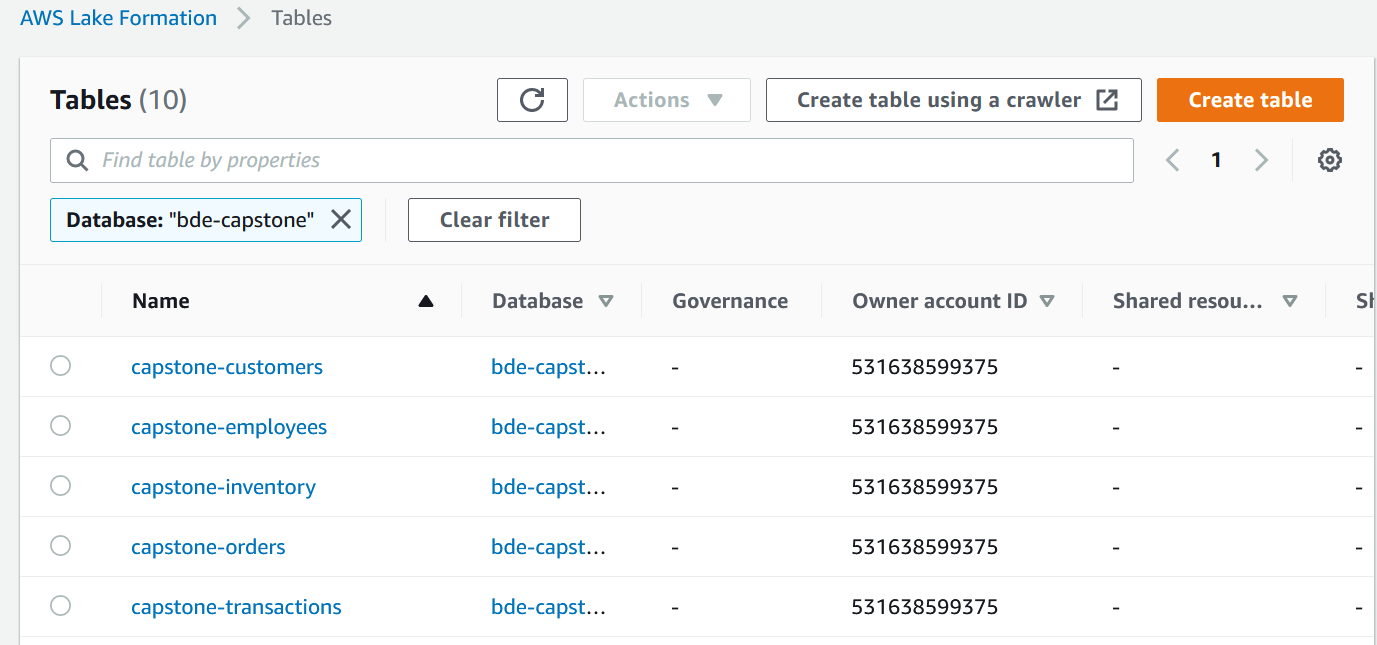

### For each of the tables in the RDS the following script was used to ingest the data through a Kinesis Firehose Stream to an S3 Bucket. Each Data Stream was named "Kinesis-Put-[Table name]." The Data Stream converted the data type to parquet using the tables in the Lake Formation as a schema.

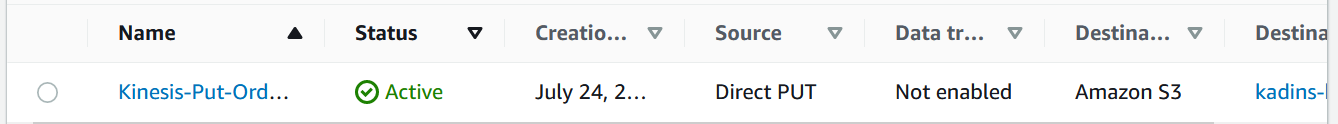

Import Packages.

In [ ]:
import sys
!{sys.executable} -m pip install boto3
!{sys.executable} -m pip install mysql.connector
import boto3
import mysql.connector
import json

Query the selected table in the RDS.

In [ ]:
cnx = mysql.connector.connect(user='admin', password='<Password>',
                              host='bde-capstone.cymabeiii2rx.us-west-2.rds.amazonaws.com',
                              database='bde-capstone')

query = "SELECT * FROM <Table name>"

cur = cnx.cursor()
results = cur.execute(query)
rows = cur.fetchall()

Format the data into a list of dictionaries.

In [ ]:
TransactionRows = []
for i in rows:
    i_dict = {'<Column1>': i[0], '<Column2>': i[1], ... , '<ColumnX>': i[X-1]}
    TransactionRows.append(i_dict)

Format the data into a form which can be ingested by Kinesis Firehose.

In [ ]:
firehose = boto3.client('firehose')

columns = ['<Column1>', '<Column2>', '<Column3>', '<Column4>']

record_batch = []
json_record_batch = None
for row in TransactionRows:
    record_to_stream = {}
    row_list = []
    for k, v in row.items():
        row_list.append(v)
    record_to_stream["Data"] = bytes(str(json.dumps(dict(zip(columns, row_list)), default=str)), 'utf-8')
    record_batch.append(record_to_stream)

The .put_record_batch() function in the Boto3 package has a limit of 500 items per instance. For tables with more than 500 rows, the record_batch list was broken into lists of 500.

In [ ]:
record_batch1 = record_batch[0:500]
record_batch2 = record_batch[500:1000]
record_batch3 = record_batch[1000:1500]

Ingest the data into the Kinesis Firehose Stream.

In [ ]:
batch_response1 = firehose.put_record_batch(
    DeliveryStreamName='Firehose-Put-[Table name]',
    Records=record_batch1
)
print('batch_response1')
print(batch_response1)

batch_response2 = firehose.put_record_batch(
    DeliveryStreamName='Firehose-Put-[Table name]',
    Records=record_batch2
)
print('batch_response2')
print(batch_response2)

batch_response3 = firehose.put_record_batch(
    DeliveryStreamName='Firehose-Put-[Table name]',
    Records=record_batch3
)
print('batch_response3')
print(batch_response3)

In the S3 bucket named kadins-bde-capstone, a Folder in S3 was created for each table. Each table was then ingested from the RDS into the folder \parquet\ in the appropriate table folder.

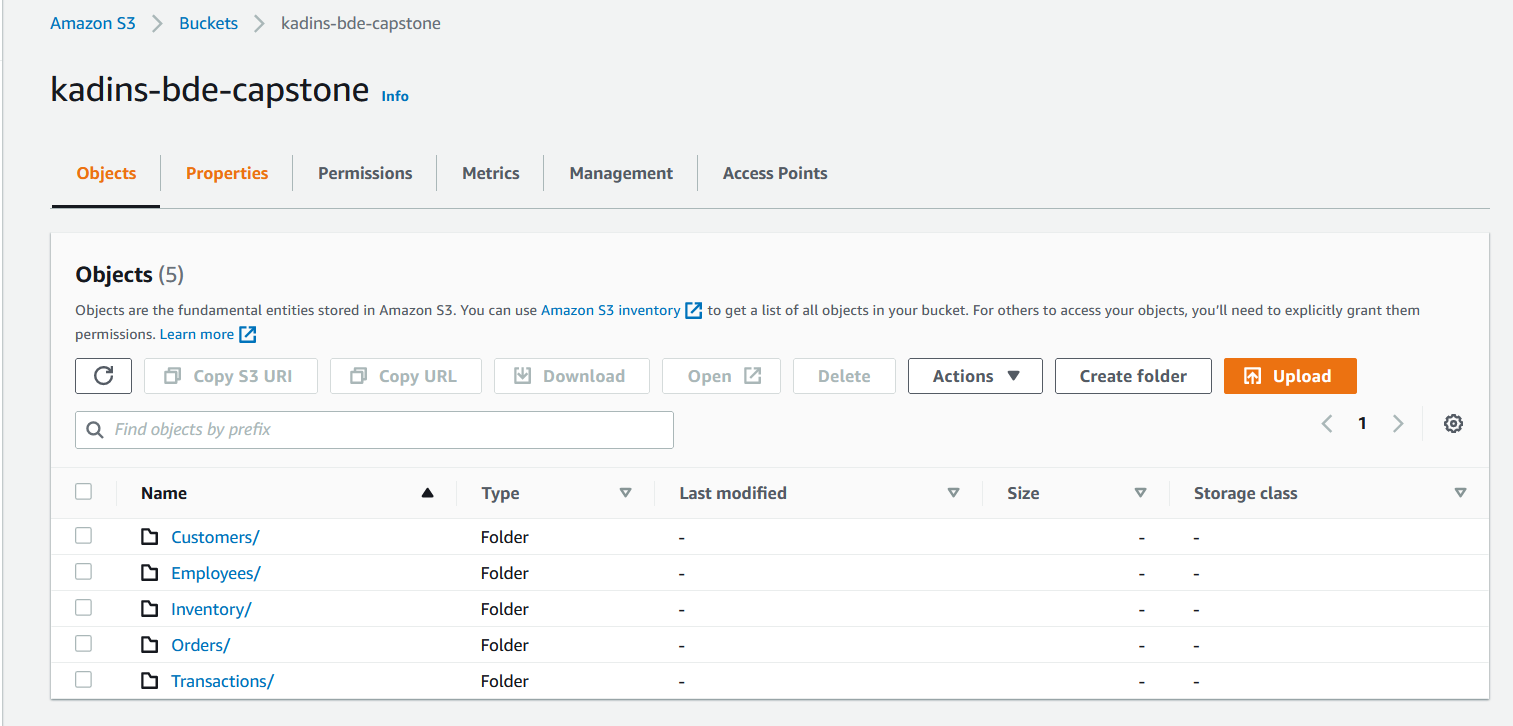

## Create an AWS Glue Crawler for each table

### A glue table was created for each parquet table in the S3 bucket to the "bde-database" created in lake formation.

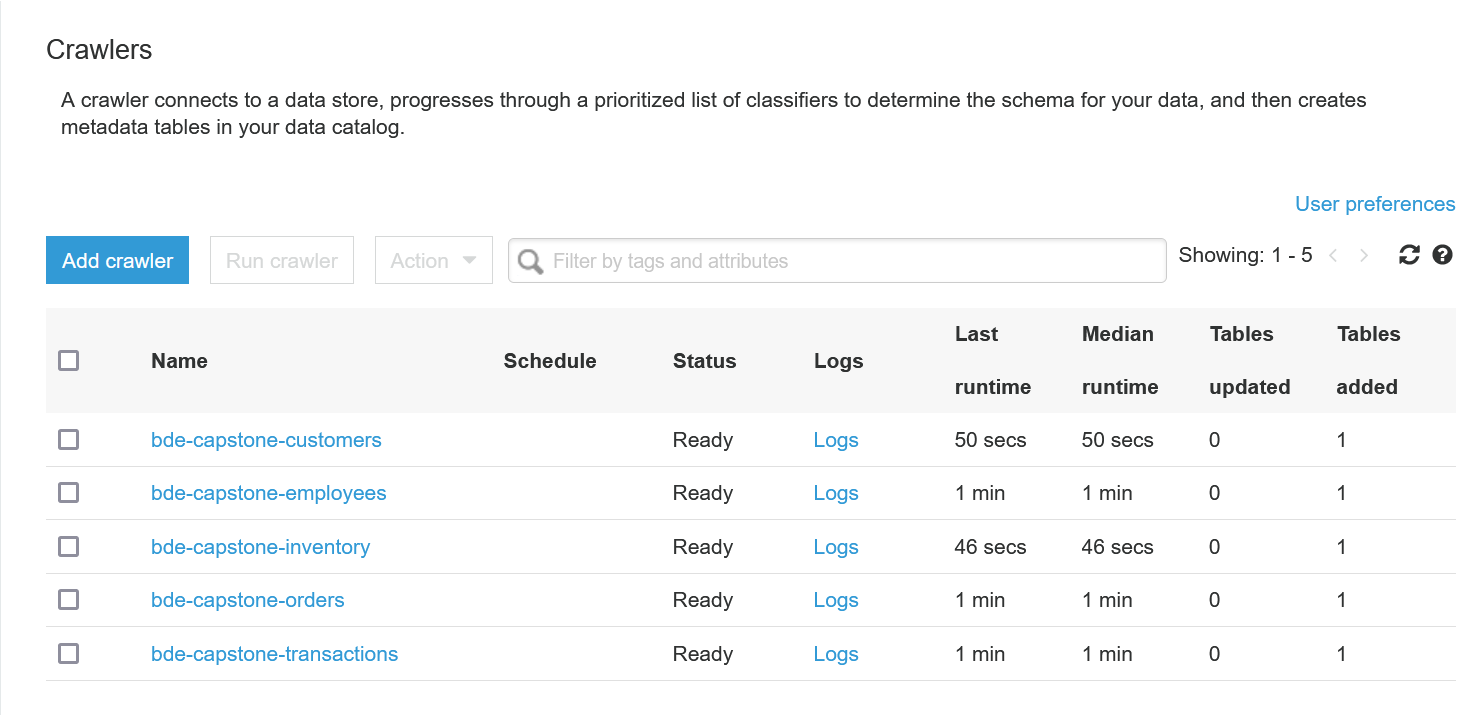

### Each table was queried using Athena to verify the data is in the correct format

#### Customers Table

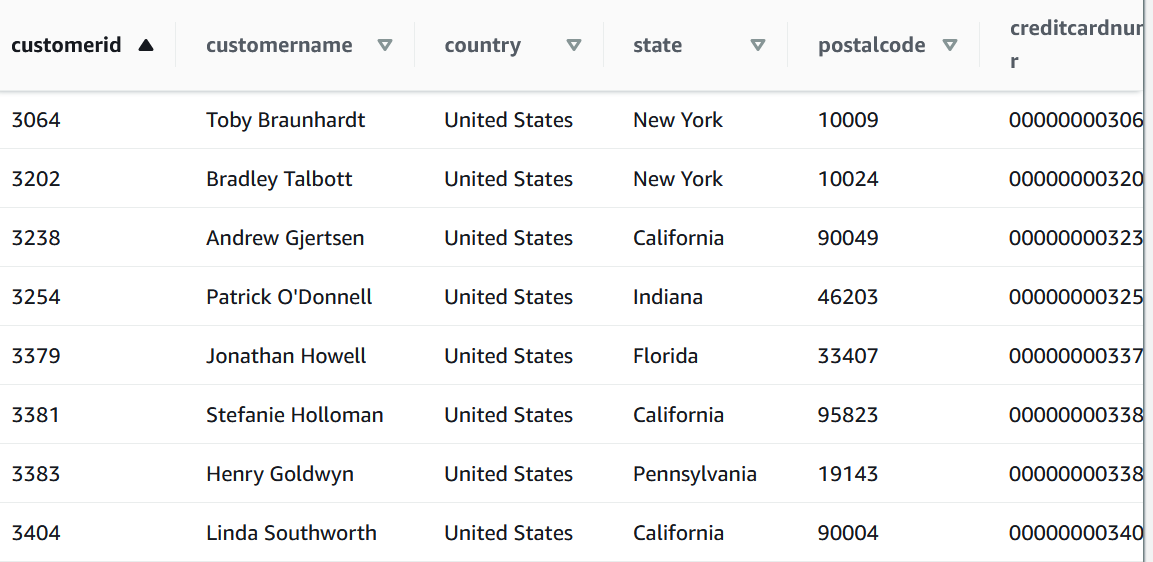

#### Employees Table

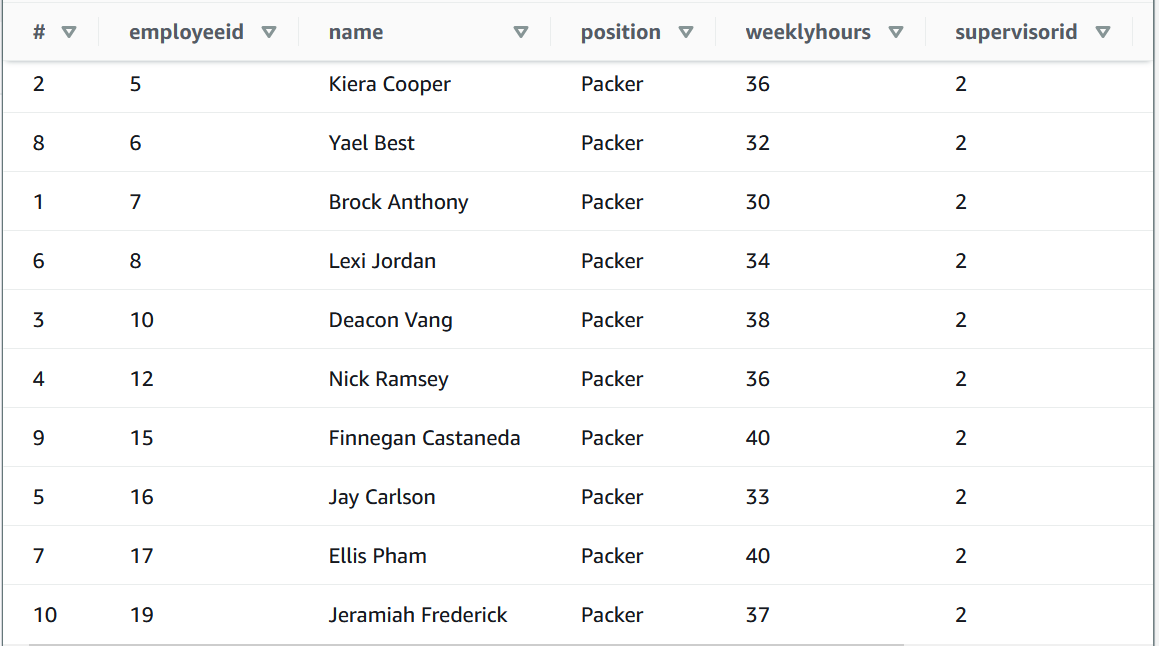

#### Inventory Table

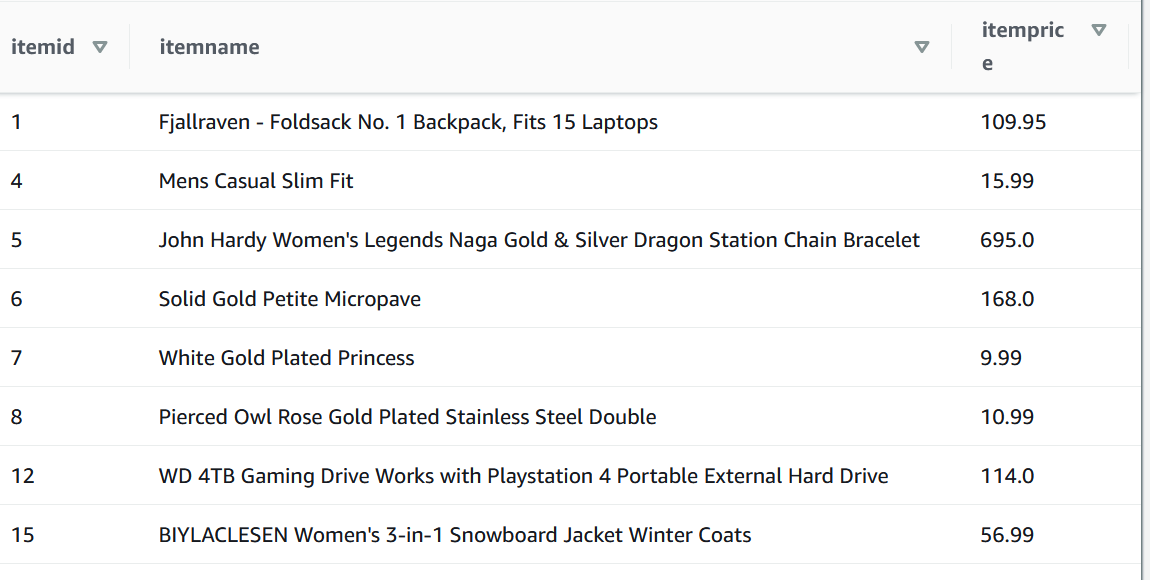

#### Orders Table

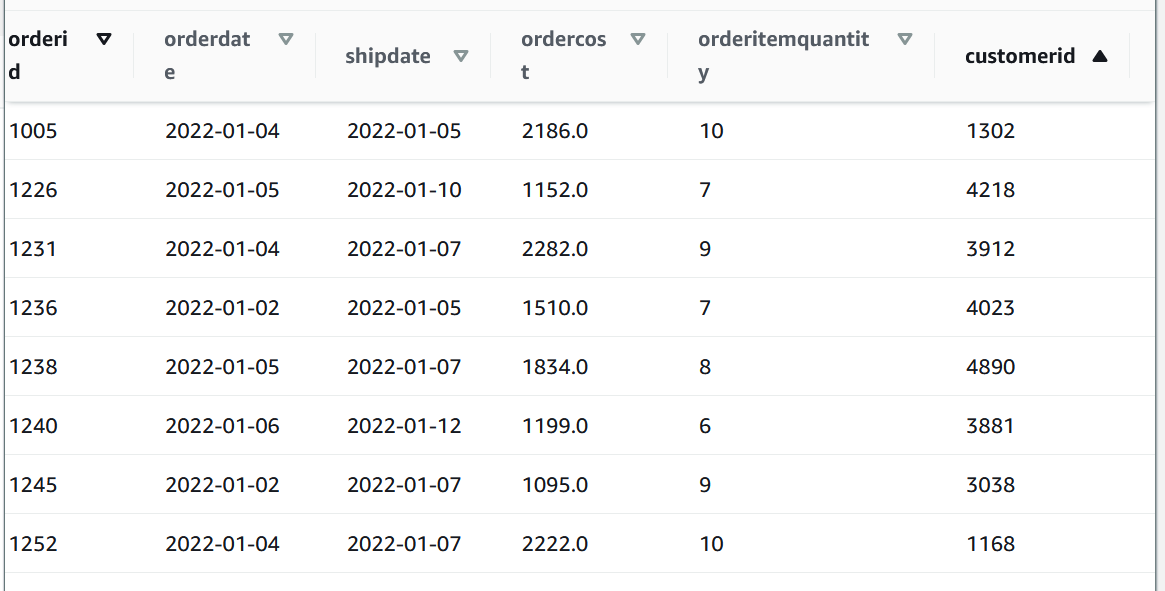

#### Transactions Table

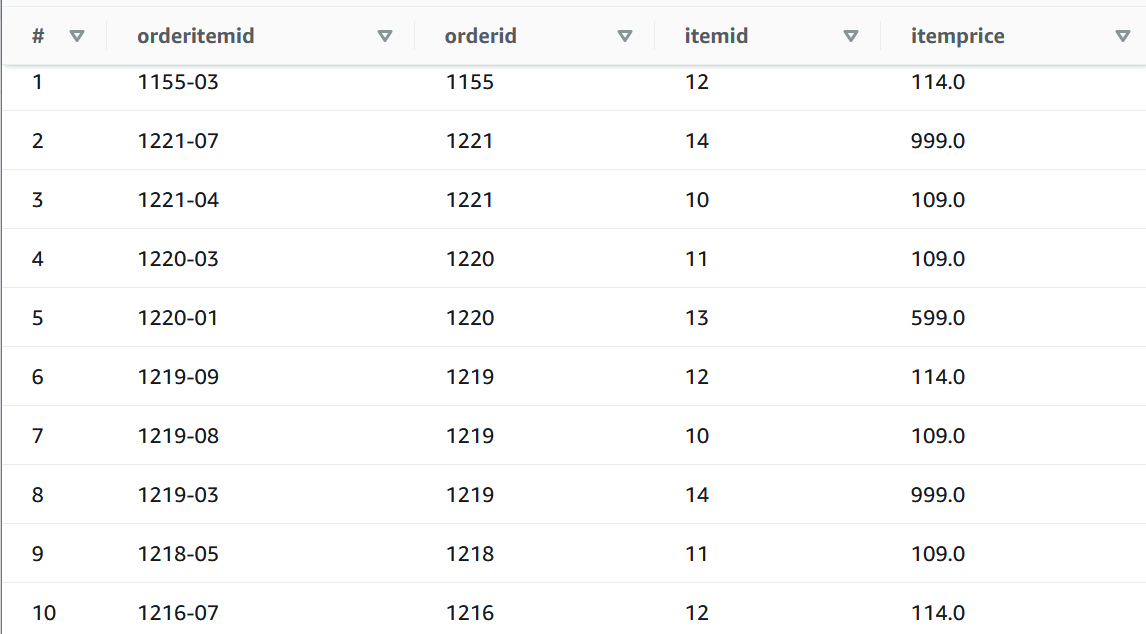

## Use Lake Formation to create a Data Lake

### Create Data Lake user with admin permissions

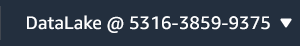

### Connect to glue catalogue for transaction tables

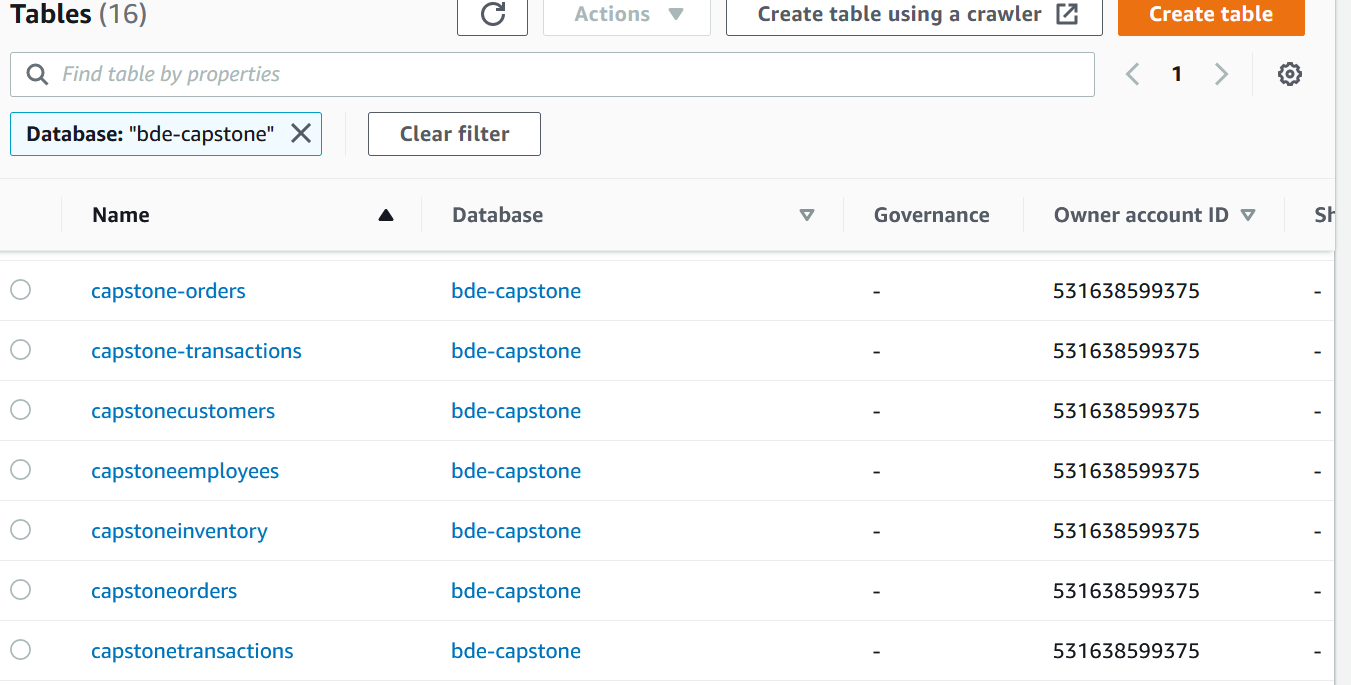

### capstonetransactions Table

#### capstonetransactions table properties

In [ ]:
{
     "Name": "capstonetransactions",
     "DatabaseName": "bde-capstone",
     "Owner": "531638599375",
     "CreateTime": "2022-07-27T00:32:41.000Z",
     "UpdateTime": "2022-07-27T00:32:41.000Z",
     "LastAccessTime": "1970-01-01T00:00:00.000Z",
     "Retention": 0,
     "StorageDescriptor": {
          "Columns": [
               {
                    "Name": "orderitemid",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "orderid",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "itemid",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "itemprice",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               }
          ],
          "Location": "s3://kadins-bde-capstone/AthenaOutput/Unsaved/2022/07/26/tables/efc6fd10-7a7b-46ab-8c7d-5894fb9bce83/",
          "InputFormat": "org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat",
          "OutputFormat": "org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat",
          "Compressed": false,
          "NumberOfBuckets": 0,
          "SerdeInfo": {
               "Name": "capstonetransactions",
               "SerializationLibrary": "org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe",
               "Parameters": {}
          },
          "BucketColumns": [],
          "SortColumns": [],
          "Parameters": {},
          "StoredAsSubDirectories": false
     },
     "PartitionKeys": [],
     "ViewOriginalText": "",
     "ViewExpandedText": "",
     "TableType": "EXTERNAL_TABLE",
     "Parameters": {
          "EXTERNAL": "TRUE",
          "has_encrypted_data": "false",
          "parquet.compression": "GZIP",
          "presto_query_id": "20220727_003238_00015_gdd4g"
     },
     "CreatedBy": "arn:aws:iam::531638599375:user/Kadin",
     "IsRegisteredWithLakeFormation": true,
     "CatalogId": "531638599375",
     "IsRowFilteringEnabled": false,
     "VersionId": "0",
     "DatabaseId": "4b39baee2bba470dacc0b36dc09118ee"
}

#### Verify Data Lake capstonetransactions Table

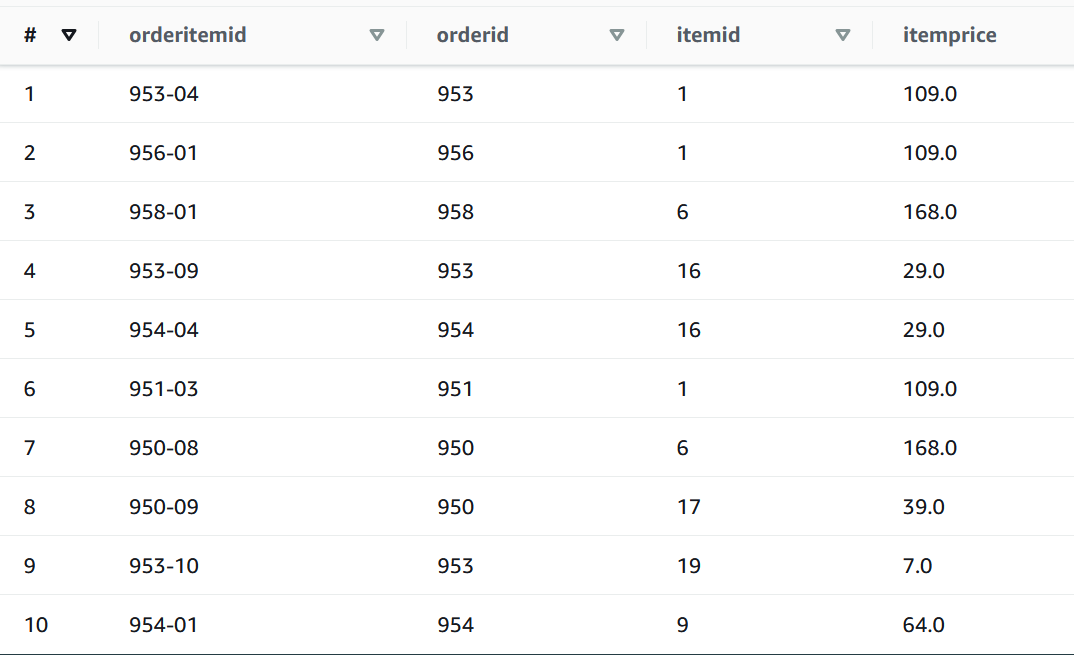

### capstoneorders Table

#### capstoneorders table properties

In [ ]:
{
     "Name": "capstoneorders",
     "DatabaseName": "bde-capstone",
     "Owner": "531638599375",
     "CreateTime": "2022-07-27T00:33:33.000Z",
     "UpdateTime": "2022-07-27T00:33:33.000Z",
     "LastAccessTime": "1970-01-01T00:00:00.000Z",
     "Retention": 0,
     "StorageDescriptor": {
          "Columns": [
               {
                    "Name": "orderid",
                    "Type": "int",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "orderdate",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "shipdate",
                    "Type": "string",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "ordercost",
                    "Type": "float",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "orderitemquantity",
                    "Type": "int",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "customerid",
                    "Type": "int",
                    "Comment": "",
                    "tagCount": 0
               },
               {
                    "Name": "employeeid",
                    "Type": "int",
                    "Comment": "",
                    "tagCount": 0
               }
          ],
          "Location": "s3://kadins-bde-capstone/AthenaOutput/Unsaved/2022/07/26/tables/5fe07571-ac37-4350-afc5-bb6169dbdd4f/",
          "InputFormat": "org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat",
          "OutputFormat": "org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat",
          "Compressed": false,
          "NumberOfBuckets": 0,
          "SerdeInfo": {
               "Name": "capstoneorders",
               "SerializationLibrary": "org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe",
               "Parameters": {}
          },
          "BucketColumns": [],
          "SortColumns": [],
          "Parameters": {},
          "StoredAsSubDirectories": false
     },
     "PartitionKeys": [],
     "ViewOriginalText": "",
     "ViewExpandedText": "",
     "TableType": "EXTERNAL_TABLE",
     "Parameters": {
          "EXTERNAL": "TRUE",
          "has_encrypted_data": "false",
          "parquet.compression": "GZIP",
          "presto_query_id": "20220727_003330_00080_fg3wk"
     },
     "CreatedBy": "arn:aws:iam::531638599375:user/Kadin",
     "IsRegisteredWithLakeFormation": true,
     "CatalogId": "531638599375",
     "IsRowFilteringEnabled": false,
     "VersionId": "0",
     "DatabaseId": "4b39baee2bba470dacc0b36dc09118ee"
}

#### Verify Data Lake capstoneorders Table

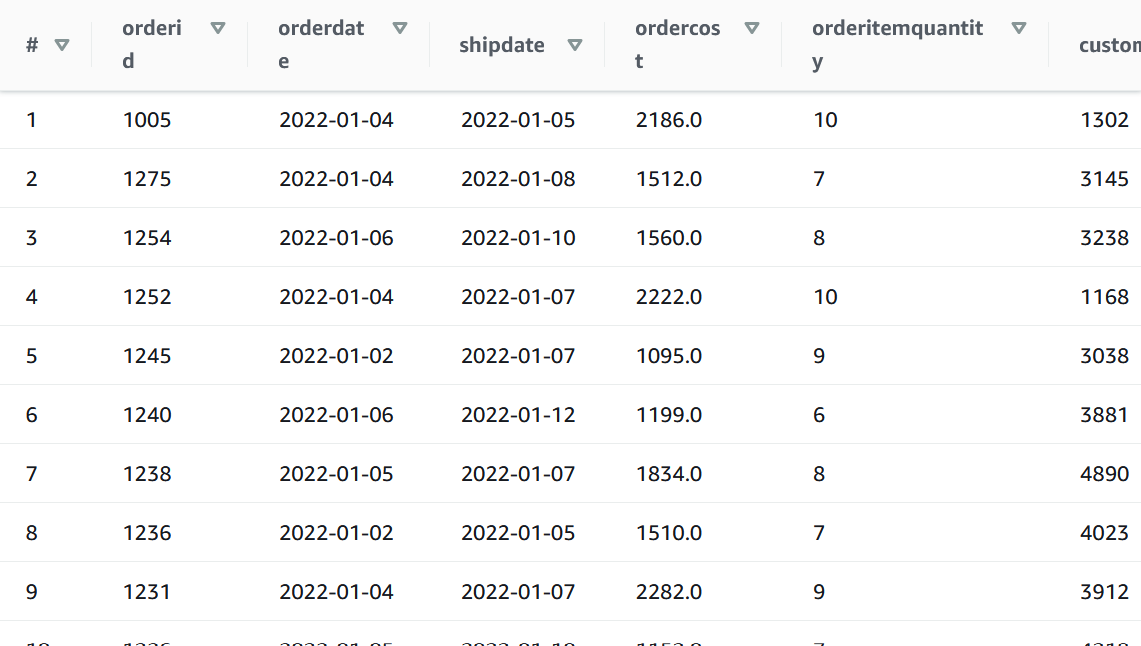

## Create a Redshift Cluster

### I created the redshift cluster bde-capstone

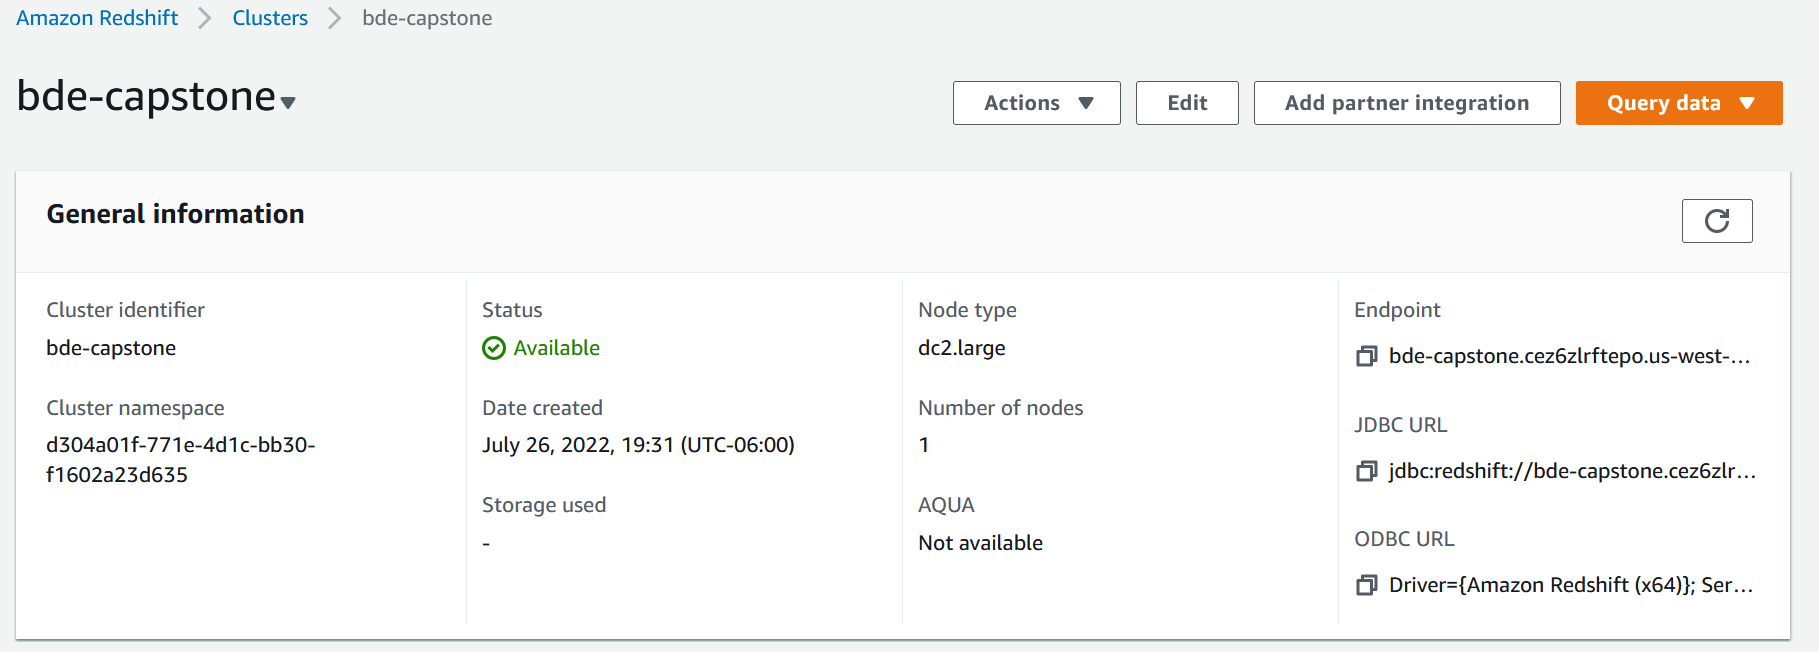

### Conect Redshift to Data Lake and create an external schema

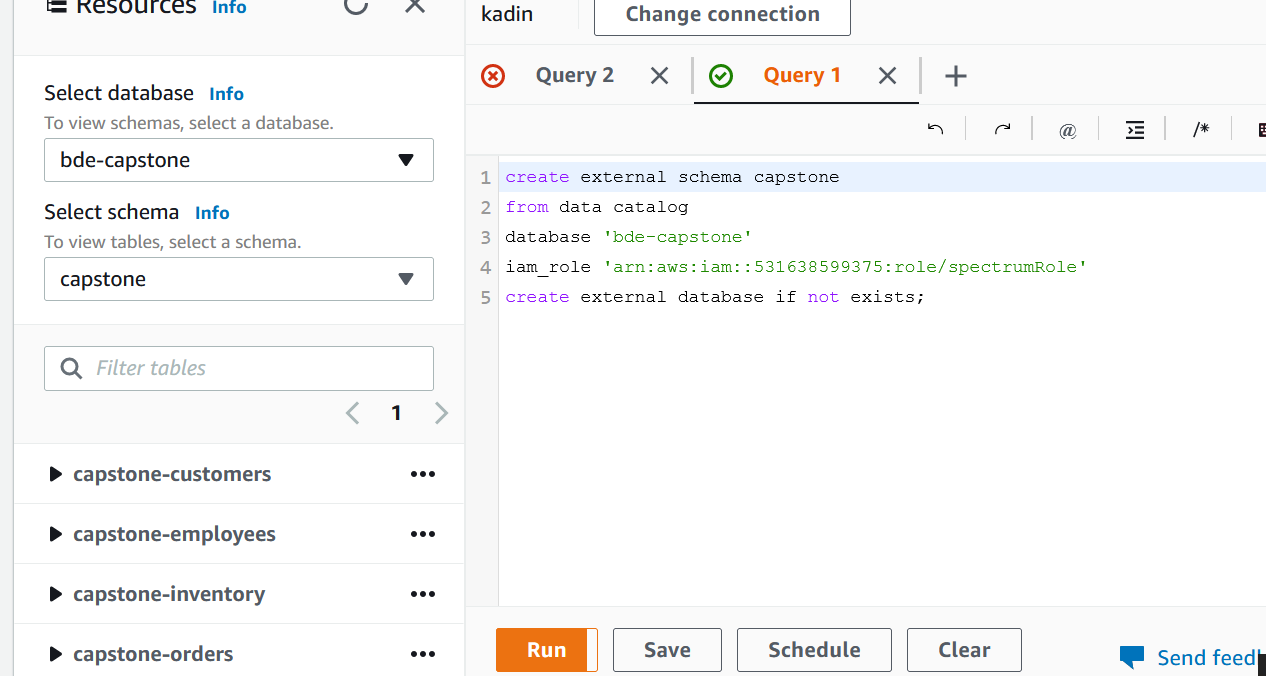

### Create external Customers Table

In [ ]:
create external table capstone.Customers(
customerid int,
customername varchar(30),
country	varchar(30),
state varchar(30),
postalcode varchar(12),
creditcardnumber varchar(12)
)
stored as parquet
location 's3://kadins-bde-capstone/Customers/Parquet/'

### Preview Customers Table

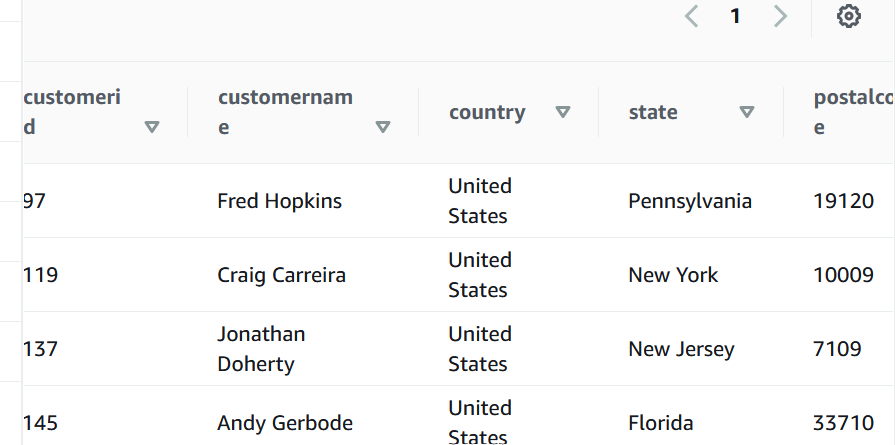

### Create external Inventory Table

In [ ]:
create external table capstone.Inventory(
itemid int,
itemname text,
itemprice float,
itemdescription	text,
itemcategory varchar(50),
itemimage text,
itemrating varchar(30)
)
stored as parquet
location 's3://kadins-bde-capstone/Inventory/Parquet/'

### Preview Inventory Table

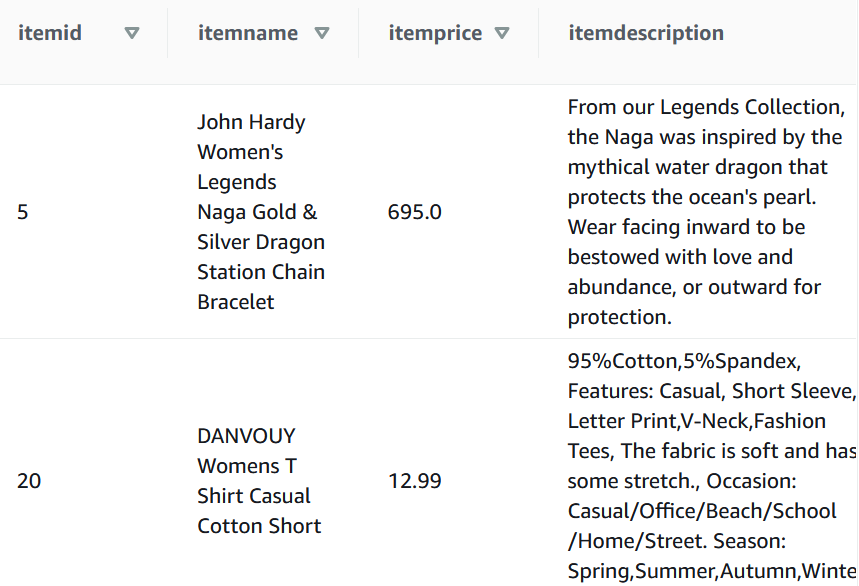

### Create external Empoyees Table

In [ ]:
create external table capstone.Employees(
employeeid int,
name varchar(50),
position varchar(30),
weeklyhours	int,
supervisorid int,
workloadperhour	varchar(30)
)
stored as parquet
location 's3://kadins-bde-capstone/Employees/Parquet/';

### Preview Employees Table

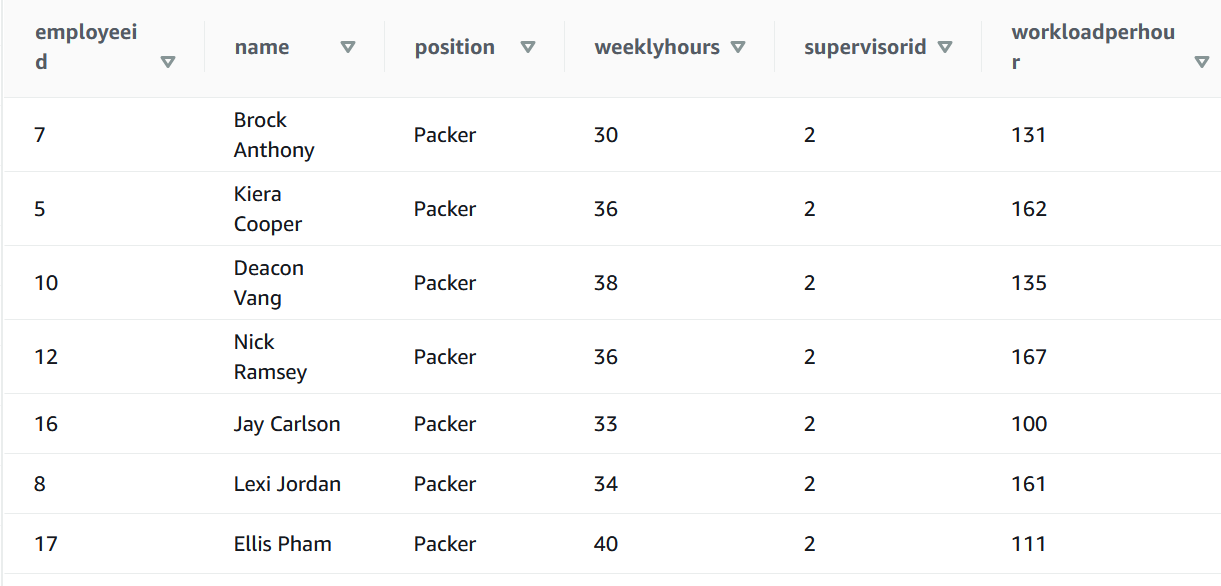

### Create external Orders Table

In [ ]:
create external table capstone.Orders(
orderid int,
orderdate date,
shipdate date,
ordercost float,
orderitemquantity int,
customerid int,
employeeid int
)
stored as parquet
location 's3://kadins-bde-capstone/Orders/Parquet/';

### Preview Orders Table

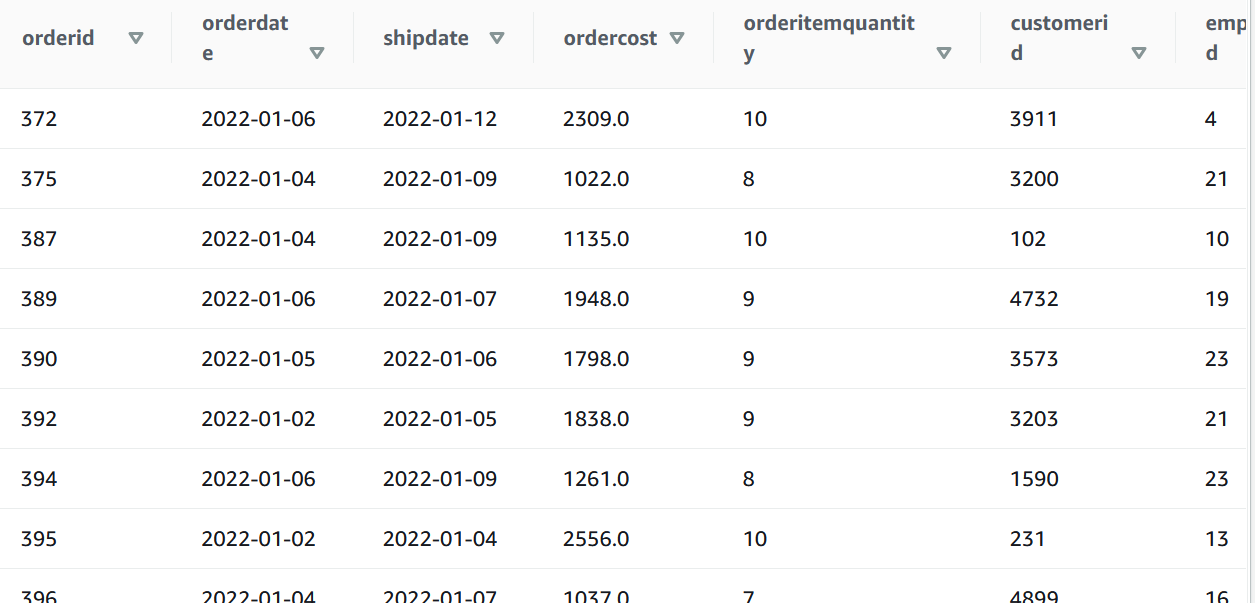

### Create external Transactions Table

In [ ]:
create external table capstone.Transactions(
orderitemid varchar(20),
orderid int,
itemid int,
itemprice float
)
location 's3://kadins-bde-capstone/AthenaOutput/Unsaved/2022/07/26/tables/efc6fd10-7a7b-46ab-8c7d-5894fb9bce83/';
    

### Preview Transactions Table

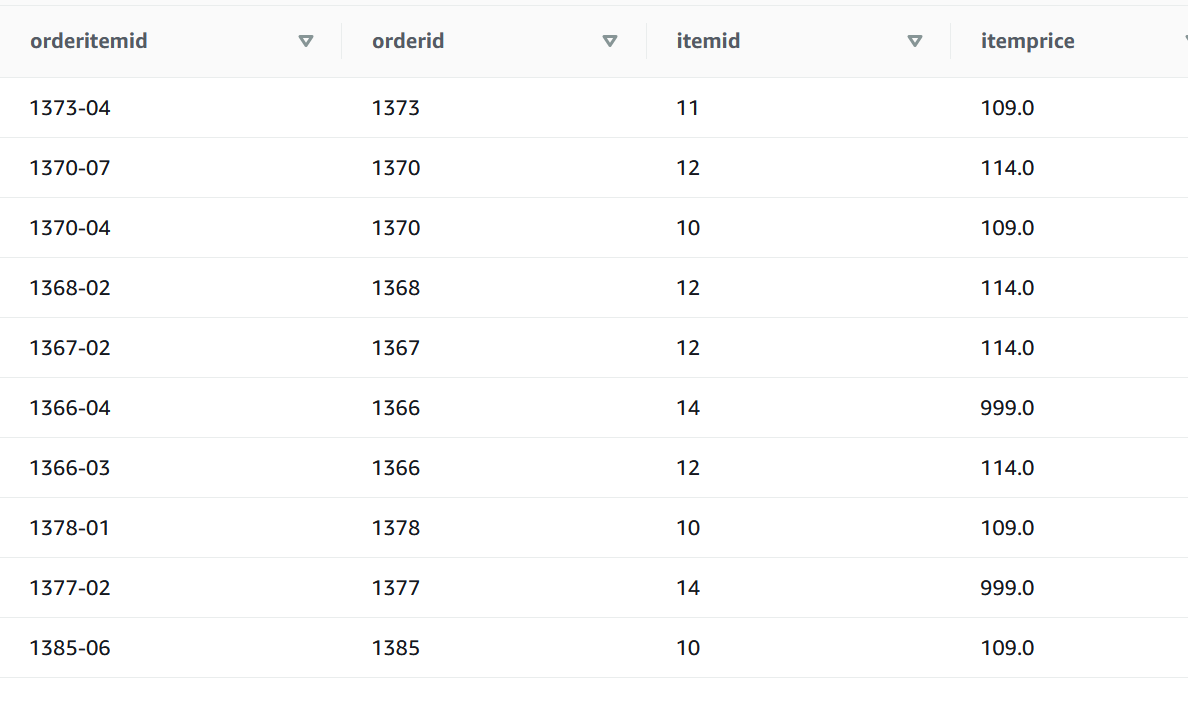

## Conclusion

#### &emsp;This project doccuments the process I used to import and ingest external data through AWS. 
#### &emsp;I chose to model a mock business in this project based on the fulfillment center I work at. To start I mapped out how I thought a business process would work for a fulfillment center. Using this process I determined what data I needed, and how it ought to look. This was represented in the logical and physical data models built using the toad data modeler program. From the physical data model I generated a Data Definition Language script, which I deployed to an AWS RDS instance, called bde-capstone, running MySQL. I did not choose MySQL for any particular reason though in the future I would likely choose to run an aroura serveless cluster, since this would give me access to the query editor.
#### &emsp; When generating the DDL I set the data type for the CreditCardNumber column in the Customers table as an int(16), however this should be a varchar(16) to avoid dropping any leading zeroes.
#### &emsp;Next, I generated 5 data tables and uploaded each table to bde-capstone RDS. The three master data tables, Customers, Employees, and Inventory represent the three discrete entities from which the transactional data is generated.
#### &emsp;The Customers table was created by removing unnecessary data from the sample-superstore.csv file, which was downloaded from kaggle. The column CreditCardNumber was created to represent the customer's payment information. The numbers used in this project are fake and could not function as payment options, however if this process was applied to real life credit card information eforts would be made to encrypt the data.
#### &emsp;The Employees table was programatically generated from a list of names. I created a column called WorkloadPerHour, which I had originally intended to act as a way to calculate how many rows should be generated in the Transactions table. I ended up using the WeeklyItemsPacked parameter to fill this role instead as I felt it had a more accurate representation of the number of items packed in a week. I believe when I was writing the script to generate the Employee data I confused myself and chose a number closer to daily output, rather than hourly.
#### &emsp;The Inventory table was generated by calling the the REST api fakestoreapi.com and formatting the responses into a pandas dataframe in python. I was unfamiliar with apis before starting this project and it took me a while to learn how to call them for this table. The information from fakestoreapi.com is useful for the purposes of this project, and is a good representation of the information that would displayed to the customer. If this project was applied to real life inventory, information on stock counts, pick locations, and weights would all need to be added. However, fakestoreapi.com does not allow for changes to be made to the items in the api, and since I was generating the Transactions table by calling the api rather than referencing the Inventory table, these could not be added.
#### &emsp;The two transactional data tables, Orders and Transactions, represent the interactions between the three master data tables. These tables were both generated at the same time order by order, though they represent two different levels of date. The Orders table looks at this on the order level, and represents the interaction between the Customer, the Employees, and the Inventory (through the transactions table). The information in this table is what would be needed by the inventory management software to generate the label and assign the order to a Packer. This table also serves as record keeping for administration purposes. 
#### &emsp;The Transactions table however looks at the data on the item level, and represents the composition of each order in the Orders table. This is the information that the inventory management software would need to calculate the shipping cost and keep accurate stock counts. The Transactions table also contains the information that the Packer would need to correctly pick and pack this order.
#### &emsp;It would be possible to create one big table combining the Orders and Transactions table. This table would have the columns: OrderItemId, OrderDate, ShipDate, CustomerId, EmployeeId, OrderId, OrderCost, NumberOfItemsInOrder, ItemCountInOrder, ItemId, ItemCost, and would have a row for each item shipped. This means the information from the OrderDate column to the NumberOfItemsInOrder column would either need to be duplicated for each item in an order, or would have a null value for all but the first row of an order. To me this is a very big and unweildy data table. It made sense to me to instead have separate tables looking at the order from different perspectives. 
#### &emsp;After my data was generated and uploaded, I created an S3 bucket called kadins-bde-capstone, and created folders for each of the data tables. Through the lake formation service I created a database called bde-capstone, in which I created a schema of each of the data tables. 
#### &emsp;A kinesis firehose delivery stream was created for each of the tables from a direct-put to the S3 bucket. The firehose stream used the schemas to transform the data into a parquet format before delivering it to the S3 bucket. A boto3 script was generated for each of the tables. The script first queried the RDS, then converted the data into a JSON format for each row, finally it used the .put_records_batch() function to add the data to the correct firehose stream. A glue crawler was then created for each parquet file to allow them to be queried by Athena.
#### &emsp;I had particular difficulty with this step. The first problem I faced was that in the original version of my script, the .put_records_batch() function was throwing errors for my larger tables. I figured out that the reason for this was that the .put_records_batch() function is capped at 500 records, which meant that tables with more than 500 rows were to large. The easy fix for this was to segment my data before using the function. The next problem I had came when I tried querying the data through Athena. On my first attempt I tried ingesting the data without performing a transformation, which did work in that it moved the data from the RDS to the S3 bucket. However the data was in a JSON format and I could not query it with through Athena using a glue crawler. At this point I created new firehose streams which did transform the data into parquet form. I created the schemas in lake formation and ran the boto3 script with the new firehose streams. I was able to query the data through Athena after doing the transfomations.
#### &emsp;Once the data was ingested I began the process of creating a redshift cluster for long term storage. Through lake formation I verified that I could connect to the glue catalogue, and verified the two transactional tables. Then I created a Redshift cluster, which I named bde-capstone. In redshift I created the external schema capstone and created an external redshift table for each parquet table in my S3 bucket.

#### A copy of this notebook, as well as a csv of each of the data tables can be found at the git hub repository https://github.com/Kadin-F/Kadins-BDE-Capstone